<a href="https://colab.research.google.com/github/delpita1/Fraud-Detection/blob/main/Delpita_Putri_Progress_Script_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading Data and EDA

In [ ]:
import os
import math
from numpy import *
import numpy as np
import pandas as pd
import random
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization

from google.colab import drive
import subprocess
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Fraud.csv'
data = pd.read_csv(file_path)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## EDA with full dataset

In [ ]:
#check the shape of the dataset
data.shape

(6362620, 11)

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#Check if there is anu null values
data.isna().sum().sum()


0

In [ ]:
#check for duplicate values
data.duplicated(keep='first').any()


False

### Distribution of all Transactions

Text(0.5, 1.0, 'Distribution of Transactions over the Time')

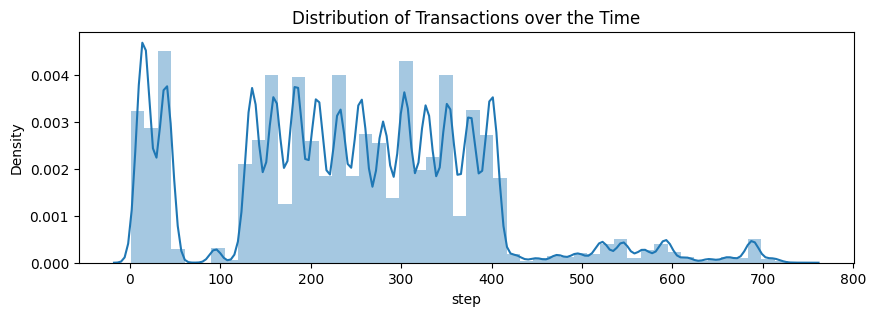

In [ ]:
#Distribution of the frequency of all transactions
plt.figure(figsize=(10, 3))
sns.distplot(data.step)
plt.title('Distribution of Transactions over the Time')

#### Examine the data by the labels


In [ ]:
# Filter data by the labels. Safe and Fraud transaction
safe = data[data['isFraud']==0]
fraud = data[data['isFraud']==1]

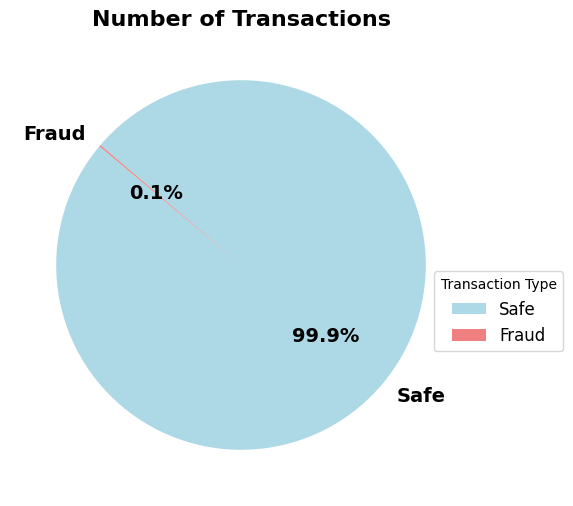

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah transaksi "Safe" dan "Fraud"
total_safe_transactions = len(safe)
total_fraud_transactions = len(fraud)

# Menghitung persentase transaksi
safe_percentage = (total_safe_transactions / (total_safe_transactions + total_fraud_transactions)) * 100
fraud_percentage = (total_fraud_transactions / (total_safe_transactions + total_fraud_transactions)) * 100

# Label dan nilai persentase
labels = ['Safe', 'Fraud']
sizes = [safe_percentage, fraud_percentage]
colors = ['lightblue', 'lightcoral']

# Membuat pie chart dengan ukuran lebih kecil dan font lebih besar
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'fontweight': 'bold'})

# Menambahkan keterangan warna di luar pie chart
legend_labels = ['Safe', 'Fraud']
legend_colors = ['lightblue', 'lightcoral']
plt.legend(legend_labels, title="Transaction Type", loc="center left", bbox_to_anchor=(0.9, 0.4), fontsize='large')

# Menambahkan judul
plt.title('Number of Transactions', fontsize=16, fontweight='bold')
plt.show()


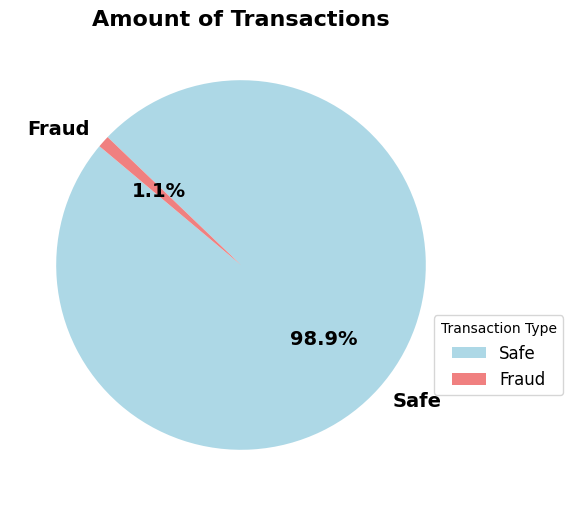

In [ ]:
import matplotlib.pyplot as plt

# Menghitung total amount untuk transaksi "Safe" dan "Fraud"
total_safe_amount = safe['amount'].sum()
total_fraud_amount = fraud['amount'].sum()

# Menghitung persentase amount
safe_percentage = (total_safe_amount / (total_safe_amount + total_fraud_amount)) * 100
fraud_percentage = (total_fraud_amount / (total_safe_amount + total_fraud_amount)) * 100

# Label dan nilai persentase
labels = ['Safe', 'Fraud']
sizes = [safe_percentage, fraud_percentage]
colors = ['lightblue', 'lightcoral']

# Membuat pie chart dengan ukuran lebih kecil dan font lebih besar
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'fontweight': 'bold'})

# Menambahkan keterangan warna di bawah pie chart
legend_labels = ['Safe', 'Fraud']
legend_colors = ['lightblue', 'lightcoral']
plt.legend(legend_labels, title="Transaction Type", loc="lower left", bbox_to_anchor=(0.9, 0.2), fontsize='large')

# Menambahkan judul
plt.title('Amount of Transactions', fontsize=16, fontweight='bold')
plt.show()


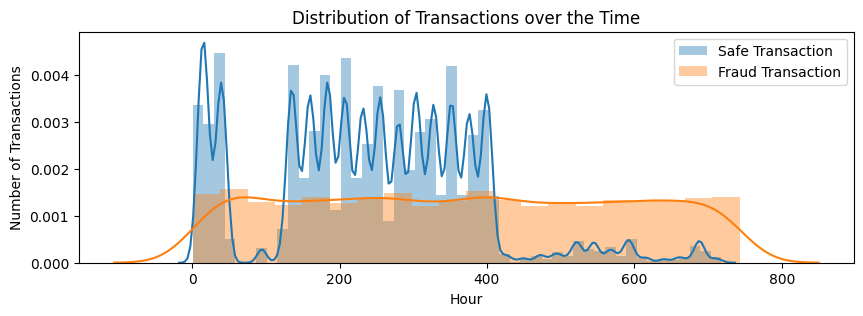

In [ ]:
#See the frequency of the transactions for each class on the same plot.
plt.figure(figsize=(10, 3))
sns.distplot(safe.step, label="Safe Transaction")
sns.distplot(fraud.step, label='Fraud Transaction')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions over the Time')
plt.legend()

### Hourly Transaction Amounts

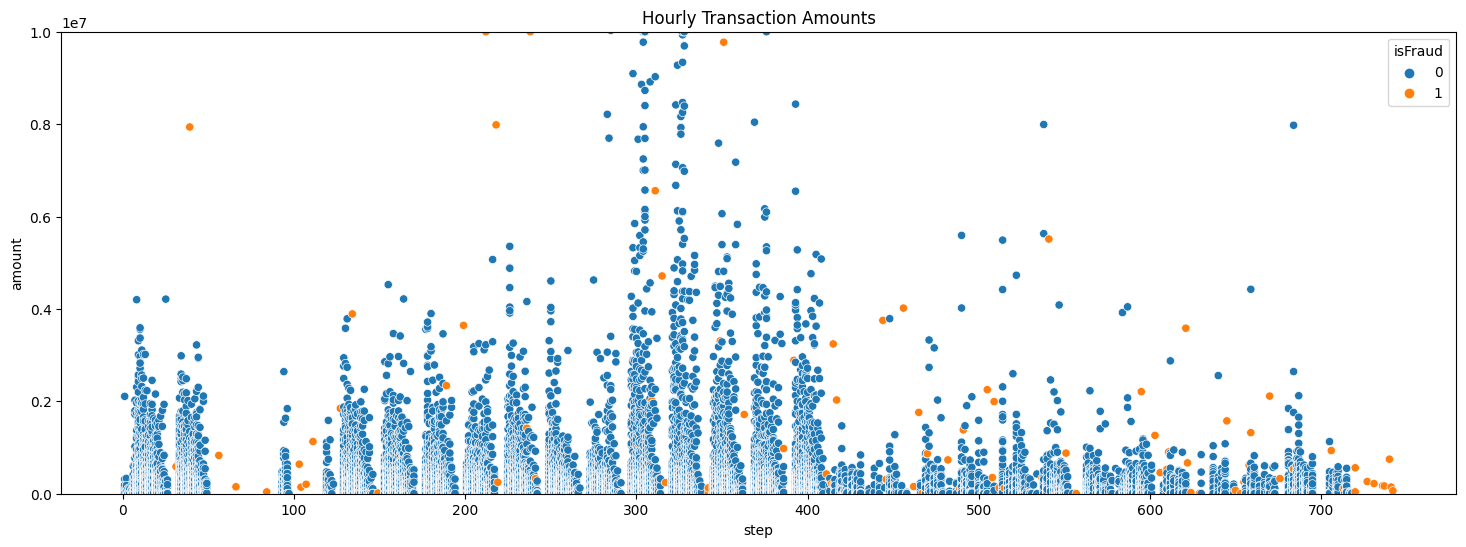

In [ ]:
#just use small portion of data to scatterplot the transaction happens every hour and their amount.
smalldata=data.sample(n=100000, random_state=1)
smalldata=smalldata.sort_index()
smalldata=smalldata.reset_index(drop=True)

#plot the small data
plt.figure(figsize=(18,6))
plt.ylim(0, 10000000)
plt.title('Hourly Transaction Amounts')
ax = sns.scatterplot(x="step", y="amount", hue="isFraud",
                     data=smalldata)

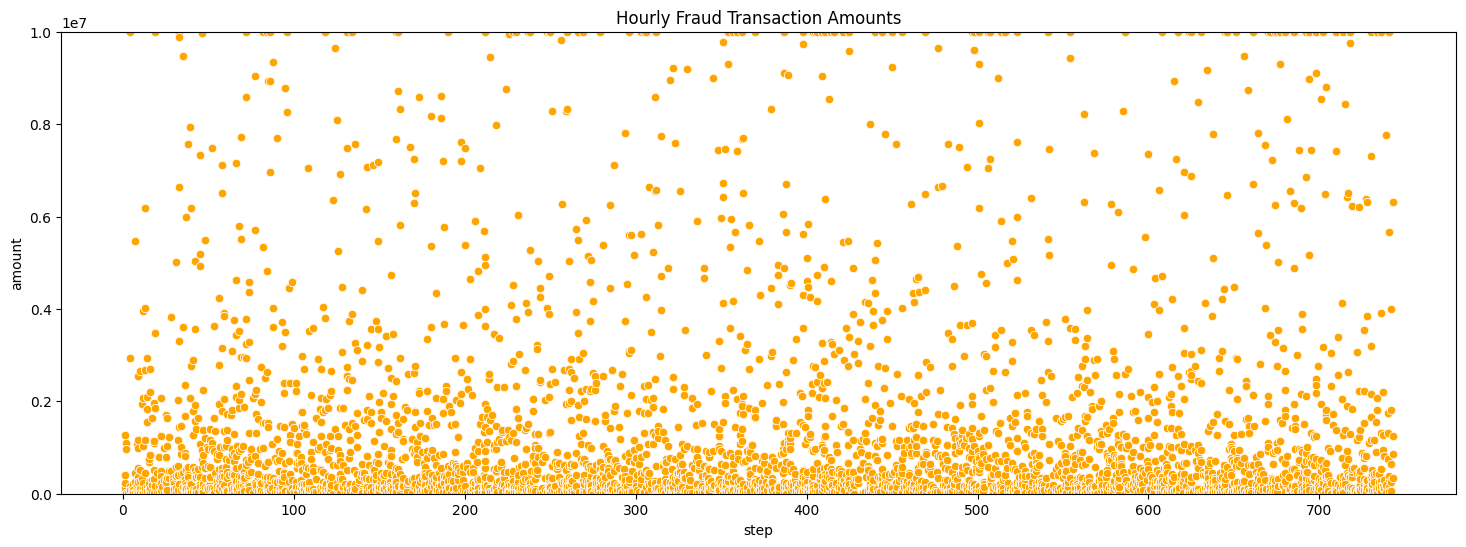

In [ ]:
#The hourly amount of al fraud transactions
plt.figure(figsize=(18,6))
plt.ylim(0, 10000000)
plt.title('Hourly Fraud Transaction Amounts')
ax = sns.scatterplot(x="step", y="amount", color='orange',
                     data=fraud)

### Transaction Amount Distributions

<Axes: title={'center': 'Safe Transaction Amount Distribution'}, xlabel='amount', ylabel='Density'>

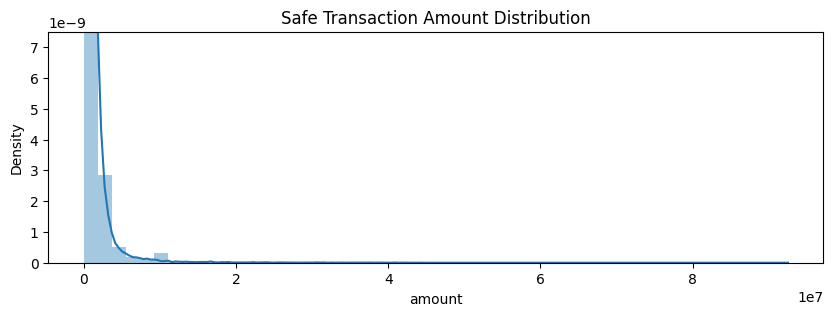

In [ ]:
#safe transactions amount distribution plot
plt.figure(figsize=(10,3))
plt.ylim(0, 0.0000000075)
plt.title('Safe Transaction Amount Distribution')
sns.distplot(safe.amount)

In [ ]:
safe.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

<Axes: title={'center': 'Fraud Transaction Amount Distribution'}, xlabel='amount', ylabel='Density'>

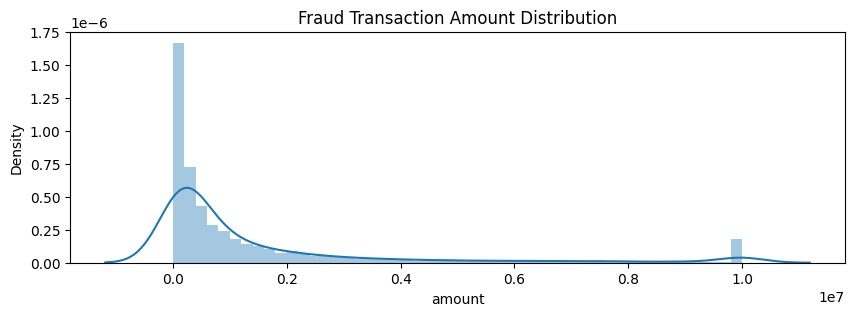

In [ ]:
# Fraud transactions amount distribution plot
plt.figure(figsize=(10,3))
plt.title('Fraud Transaction Amount Distribution')
sns.distplot(fraud.amount)

In [ ]:
# fraud transactions amount value counts
fraud.amount.value_counts()

10000000.00    287
0.00            16
1165187.89       4
429257.45        4
181.00           2
              ... 
149668.66        1
7316255.05       1
222048.71        1
9585040.37       1
234377.29        1
Name: amount, Length: 3977, dtype: int64

In [ ]:
fraud_amount_mean = fraud['amount'].mean()
print(f"Rata-rata Amount untuk Transaksi Fraud adalah: {fraud_amount_mean}")


Rata-rata Amount untuk Transaksi Fraud adalah: 1467967.299140387


In [ ]:
fraud_amount_min = fraud['amount'].min()
fraud_amount_max = fraud['amount'].max()

print(f"Rentang (Range) Amount untuk Transaksi Fraud adalah: {fraud_amount_min} - {fraud_amount_max}")

Rentang (Range) Amount untuk Transaksi Fraud adalah: 0.0 - 10000000.0


In [ ]:
sorted_fraud_amounts = fraud['amount'].sort_values(ascending=True)
sorted_fraud_amounts.head(20)

5996408      0.0
5996410      0.0
6266414      0.0
6205440      0.0
5563714      0.0
6362461      0.0
3247298      0.0
6281485      0.0
6296015      0.0
2736447      0.0
6362463      0.0
6351226      0.0
6168500      0.0
6362585      0.0
6281483      0.0
3760289      0.0
4965641     63.8
4965642     63.8
277266     119.0
277265     119.0
Name: amount, dtype: float64

In [ ]:
sorted_fraud = fraud.sort_values(by='amount', ascending=True)
sorted_fraud[['amount', 'isFraud']].head(25)

,amount,isFraud
5996408,0.00,1
5996410,0.00,1
6266414,0.00,1
6205440,0.00,1
5563714,0.00,1
6362461,0.00,1
3247298,0.00,1
6281485,0.00,1
6296015,0.00,1
2736447,0.00,1


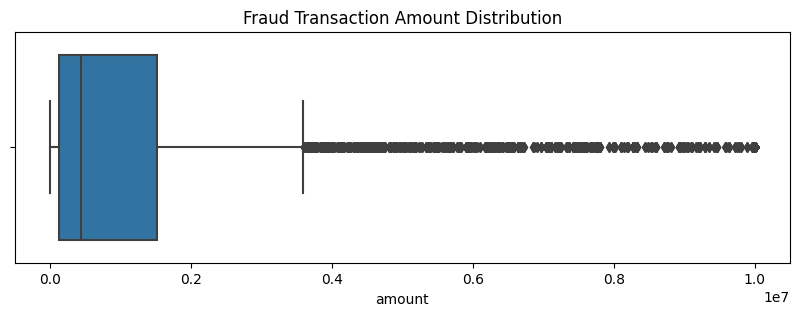

In [ ]:
#Fraud transaction boxplot for amount distribution
plt.figure(figsize=(10,3))
plt.title('Fraud Transaction Amount Distribution')
ax = sns.boxplot(x=fraud["amount"])

In [ ]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
#average amount for frauds below 400K
fraud[fraud.amount<400000].amount.mean()

144912.1682893401

In [ ]:
#checking "0" in the fraud  amount
fraud[fraud.amount==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


### Type of Transactions

In [ ]:
#checking type of  safe transactions
safe.type.value_counts()

CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64

In [ ]:
#checking type of fraud transactions
fraud.type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

### Rate of Fraud Transactions

In [ ]:
#proportion of number of frauds
data.isFraud.value_counts()[1]/(data.isFraud.value_counts()[0]+data.isFraud.value_counts()[1])

0.001290820448180152

In [ ]:
#proportion of fraud amount
fraud.amount.sum()/(safe.amount.sum()+fraud.amount.sum())

0.010535206008606473

### isFlaggedFraud column

Lets examine the isFlaggedFraud column.

In [ ]:
#value counts of isFlaggedFraud column
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
#there are only 16 positive value. lets see which ones they are.
data[data.isFlaggedFraud==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


# 2. Feature Engineering

In [ ]:
#filtering only transfer and cash_out data
data_by_type=data[data['type'].isin(['TRANSFER','CASH_OUT'])]

### Get 100000 random samples from the filtered data

In [ ]:
#subsample data , get 100000 instances to train model
df=data_by_type.sample(n=100000, random_state=1)
df=df.sort_index()
df=df.reset_index(drop=True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,136872.92,C1533123860,162075.98,25203.05,C766572210,217806.00,0.00,0,0
1,1,TRANSFER,367768.40,C288306765,0.00,0.00,C1359044626,370763.10,16518.36,0,0
2,1,CASH_OUT,81029.86,C324112183,0.00,0.00,C288665596,105343.00,8496.61,0,0
3,1,CASH_OUT,53631.83,C1233595751,0.00,0.00,C757108857,83244.00,0.00,0,0
4,1,CASH_OUT,365510.05,C1299327689,0.00,0.00,C564160838,564572.76,1254956.07,0,0


In [ ]:
#checking if there is any repetes transaction in between two parties.
list1=np.array(df.nameOrig)
list2=np.array(df.nameDest)
list3=list1+list2
repeat=pd.DataFrame(list3, columns=['comb'])
comb_cnt=repeat.comb.value_counts()
comb_cnt.value_counts()

1    100000
Name: comb, dtype: int64

### Binary encoding the type column

In [ ]:
#drop the name columns
df=df.drop(['nameOrig', 'nameDest'], axis=1)
#Binary-encoding of labelled data in 'type'

df['type'].replace({'CASH_OUT': 1, 'TRANSFER': 0}, inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,136872.92,162075.98,25203.05,217806.00,0.00,0,0
1,1,0,367768.40,0.00,0.00,370763.10,16518.36,0,0
2,1,1,81029.86,0.00,0.00,105343.00,8496.61,0,0
3,1,1,53631.83,0.00,0.00,83244.00,0.00,0,0
4,1,1,365510.05,0.00,0.00,564572.76,1254956.07,0,0


# 3. Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn.linear_model import LogisticRegression # import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score # import accuracy metrics
from sklearn.ensemble import RandomForestClassifier #import RandomForestClassifier
from sklearn import svm  #import support vector machine classifier
import xgboost as xgb
from xgboost import  XGBClassifier  #import xgboost classifier
from sklearn.neighbors import KNeighborsClassifier #import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # import GridSearchCV
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Slice the target and features from the dataset
features=df.drop('isFraud', axis=1)
target =df.isFraud

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

## 3.1. Baseline Models



In [ ]:
# General function to run classifier with default parameters to get baseline model
def ml_func (algoritm):
    #train and fit regression model
    model=algoritm()
    model.fit(X_train, y_train)

    # predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # evaluate
    train_accuracy = roc_auc_score(y_train, train_preds)
    test_accuracy = roc_auc_score(y_test, test_preds)
    #report = classification_report(y_test, test_preds)

    print(str(algoritm))
    print("------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100):.4}%")
    print(f"Test Accuracy:     {(test_accuracy * 100):.4}%")

    # store accuracy in a new dataframe
    score_logreg = [algoritm, train_accuracy, test_accuracy]
    models = pd.DataFrame([score_logreg])


In [ ]:
#list of all classifiers that I will run for base models
algoritms=[LogisticRegression,KNeighborsClassifier,RandomForestClassifier,XGBClassifier,svm.SVC]

#running each model and print accuracy scores
for algoritm in algoritms:
    ml_func (algoritm)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
------------------------
Training Accuracy: 76.83%
Test Accuracy:     74.94%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
------------------------
Training Accuracy: 84.73%
Test Accuracy:     82.12%
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
------------------------
Training Accuracy: 100.0%
Test Accuracy:     82.14%
<class 'xgboost.sklearn.XGBClassifier'>
------------------------
Training Accuracy: 100.0%
Test Accuracy:     84.52%
<class 'sklearn.svm._classes.SVC'>
------------------------
Training Accuracy: 63.14%
Test Accuracy:     60.71%


## 3.2. Grid Search for Best Hyper-Parameter



In [ ]:
#A general function for grdi search
def grid_src(classifier, param_grid):
    param_grid=param_grid
    # instantiate the tuned random forest
    grid_search = GridSearchCV(classifier, param_grid, cv=3, n_jobs=-1)

    # train the tuned random forest
    grid_search.fit(X_train, y_train)

    # print best estimator parameters found during the grid search
    print((str(classifier) + 'Best Parameters'))
    print("------------------------")
    print(grid_search.best_params_)
    return grid_search.best_params_

In [ ]:
#Grid Search for best parameters of RandomForestClassifier
param_grid_rf = {'n_estimators': [10, 80, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [10],
                  'min_samples_split': [2, 3, 4]
                 }

rf_params=grid_src(RandomForestClassifier(),param_grid_rf)

RandomForestClassifier()Best Parameters
------------------------
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 10}


In [ ]:
#Grid Search for best parameters of XGBClassifier
param_grid_xg = {'n_estimators': [100],
              'learning_rate': [0.05, 0.1],
              'max_depth': [3, 5, 10],
              'colsample_bytree': [0.7, 1],
              'gamma': [0.0, 0.1, 0.2]
                }
grid_src(XGBClassifier(), param_grid_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)Best Parameters
------------------------
{'colsample_bytree': 1, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


{'colsample_bytree': 1,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

### Run models with their best parameters

In [ ]:
#a function to train and evaluate a  model with given datasets
#it also prints the accuracy scores
def run_model(model, X_train, y_train,X_test, y_test ):
    model.fit(X_train, y_train)

    # predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # evaluate
    train_accuracy = roc_auc_score(y_train, train_preds)
    test_accuracy = roc_auc_score(y_test, test_preds)
    report = classification_report(y_test, test_preds)

    #print reports of the model accuracy
    print('Model Scores')
    print("------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100):.4}%")
    print(f"Test Accuracy:     {(test_accuracy * 100):.4}%")
    print("------------------------------------------------------")
    print('Classification Report : \n', report)

In [ ]:
# Running RandomForestClassifier with best parameters
rf_model=RandomForestClassifier(n_estimators=100,
                                  criterion= 'gini',
                                  max_depth= 10,
                                  min_samples_split= 3)


run_model(rf_model, X_train, y_train,X_test, y_test)

Model Scores
------------------------
Training Accuracy: 85.81%
Test Accuracy:     82.14%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19958
           1       1.00      0.64      0.78        42

    accuracy                           1.00     20000
   macro avg       1.00      0.82      0.89     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
# Running XGBClassifier with best parameters
xgb_model=XGBClassifier(colsample_bytree= 1,
                        n_estimators= 100,
                        gamma= 0.1,
                        learning_rate=0.1,
                        max_depth=5
                        )

run_model(xgb_model, X_train, y_train,X_test, y_test)

Model Scores
------------------------
Training Accuracy: 91.31%
Test Accuracy:     84.52%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19958
           1       0.97      0.69      0.81        42

    accuracy                           1.00     20000
   macro avg       0.98      0.85      0.90     20000
weighted avg       1.00      1.00      1.00     20000



XGBoost definetely works better with the best parameters set.

## 3.3. Dealing with Unbalanced Data

### 3.3.1. Balancing Data via Oversampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Melihat distribusi kelas sebelum oversampling
print(y_train.value_counts())

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)

# Melakukan oversampling hanya pada data pelatihan (X_train, y_train)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Melihat distribusi kelas setelah oversampling
print(pd.Series(y_resampled).value_counts())


0    79764
1      236
Name: isFraud, dtype: int64
0    79764
1    79764
Name: isFraud, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import pandas as pd

# Melihat distribusi kelas sebelum oversampling
print(y_train.value_counts())

# Inisialisasi SMOTE dengan TensorFlow backend
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5, n_jobs=tf.config.threading.get_inter_op_parallelism_threads())

# Melakukan oversampling hanya pada data pelatihan (X_train, y_train)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Melihat distribusi kelas setelah oversampling
print(pd.Series(y_resampled).value_counts())


0    79764
1      236
Name: isFraud, dtype: int64
0    79764
1    79764
Name: isFraud, dtype: int64


In [ ]:
# perform  train-test-split over resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

### Running models with the balanced data with best parameters

In [ ]:
#Running RainForest Model with resampled data
run_model(rf_model, X_train, y_train,X_test, y_test)

Model Scores
------------------------
Training Accuracy: 99.13%
Test Accuracy:     99.11%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     19710
           1       0.99      1.00      0.99     20172

    accuracy                           0.99     39882
   macro avg       0.99      0.99      0.99     39882
weighted avg       0.99      0.99      0.99     39882



In [ ]:
#Running XGBoost Model with resampled data
run_model(xgb_model, X_train, y_train,X_test, y_test)


Model Scores
------------------------
Training Accuracy: 99.68%
Test Accuracy:     99.58%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     19710
           1       0.99      1.00      1.00     20172

    accuracy                           1.00     39882
   macro avg       1.00      1.00      1.00     39882
weighted avg       1.00      1.00      1.00     39882



### 3.3.2. Subsampling Data from the Original Dataset

In [ ]:
#Filter the only types that fraud transaction occurs
data2=data[data['type'].isin(['TRANSFER','CASH_OUT'])]
#Slice data in to fraud and safe by isFraud values
safe_2 = data2[data2['isFraud']==0]
fraud_2 = data2[data2['isFraud']==1]
#get 50000 random sample from the safe transactions
safe_sample=safe_2.sample(n=50000, random_state=1)
safe_sample=safe_sample.sort_index()
safe_samplef=safe_sample.reset_index(drop=True)
#combine all fraud observation and 50000 safe transaction data in to df3
df3=pd.concat([safe_sample,fraud_2])
df3.reset_index(drop=True)
#drop name columns
df3=df3.drop(['nameOrig', 'nameDest'], axis=1)
#Binary-encoding of labelled data in 'type'
# Mengganti nilai 'CASH_OUT' dengan 1 dan 'TRANSFER' dengan 0
df3['type'].replace({'CASH_OUT': 1, 'TRANSFER': 0}, inplace=True)

df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
78,1,0,42712.39,10363.39,0.0,57901.66,24044.18,0,0
93,1,0,583848.46,0.00,0.0,667778.00,2107778.11,0,0
159,1,1,154716.20,0.00,0.0,187433.00,3461666.05,0,0
162,1,1,267148.82,0.00,0.0,641975.35,1178808.14,0,0
191,1,1,55105.90,0.00,0.0,317952.89,2719172.89,0,0


In [ ]:
#check class labels
df3.isFraud.value_counts()

0    50000
1     8213
Name: isFraud, dtype: int64

### Running models with subsampled natural data

In [ ]:
#Slide the target and features from the dataset
features2=df3.drop('isFraud', axis=1)
target2 =df3.isFraud
# split the data into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2)

In [ ]:
# Running RandomForestClassifier with best parameters
run_model(rf_model, X_train2, y_train2,X_test2, y_test2)

Model Scores
------------------------
Training Accuracy: 93.66%
Test Accuracy:     92.14%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10013
           1       0.99      0.84      0.91      1630

    accuracy                           0.98     11643
   macro avg       0.98      0.92      0.95     11643
weighted avg       0.98      0.98      0.98     11643



In [ ]:
# Running XGBClassifier with best parameters
run_model(xgb_model, X_train2, y_train2,X_test2, y_test2)

Model Scores
------------------------
Training Accuracy: 99.51%
Test Accuracy:     98.91%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10013
           1       0.98      0.98      0.98      1630

    accuracy                           0.99     11643
   macro avg       0.99      0.99      0.99     11643
weighted avg       0.99      0.99      0.99     11643



### 3.3.3 Performing SMOTE on the New Data

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting your data into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2, random_state=42)

# Checking the class distribution before oversampling
print(y_train2.value_counts())

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)

# Resample data using only the training data
X_resampled2, y_resampled2 = smote.fit_resample(X_train2, y_train2)

# Checking the class distribution after oversampling
print(pd.Series(y_resampled2).value_counts())


0    40055
1     6515
Name: isFraud, dtype: int64
0    40055
1    40055
Name: isFraud, dtype: int64


### Running models with subsampled and oversampled data

In [ ]:
# Running RandomForestClassifier with best parameters
run_model(rf_model, X_train2, y_train2,X_test2, y_test2)

Model Scores
------------------------
Training Accuracy: 93.75%
Test Accuracy:     93.16%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9945
           1       0.99      0.87      0.92      1698

    accuracy                           0.98     11643
   macro avg       0.98      0.93      0.95     11643
weighted avg       0.98      0.98      0.98     11643



In [ ]:
# Running XGBClassifier with best parameters
run_model(xgb_model, X_train2, y_train2,X_test2, y_test2)


Model Scores
------------------------
Training Accuracy: 99.49%
Test Accuracy:     99.04%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9945
           1       0.97      0.99      0.98      1698

    accuracy                           0.99     11643
   macro avg       0.99      0.99      0.99     11643
weighted avg       0.99      0.99      0.99     11643



# 4. Machine Learning Pipeline

In [ ]:
#Load necessary libraries for ml pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
# Create the pipeline
pipe = Pipeline([('scl', MinMaxScaler()),
                ('pca', PCA(n_components=7)),
                ('xgb', XGBClassifier())])

# Create the grid parameter
grid = [{'xgb__n_estimators': [100],
         'xgb__learning_rate': [0.05, 0.1],
         'xgb__max_depth': [3, 5, 10],
         'xgb__colsample_bytree': [0.7, 1],
         'xgb__gamma': [0.0, 0.1, 0.2]
                }]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,
                  param_grid=grid,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gridsearch.best_score_)

# Best params
print('\nBest params:\n', gridsearch.best_params_)


Best accuracy: 0.995

Best params:
 {'xgb__colsample_bytree': 0.7, 'xgb__gamma': 0.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 10, 'xgb__n_estimators': 100}


# 5. Feature Importance

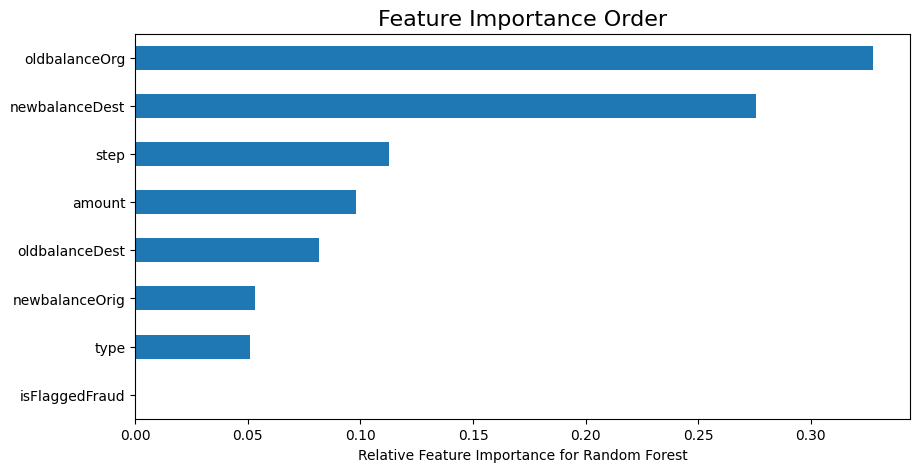

In [ ]:
# plot the important features - based on Random Forest
feat_importances = pd.Series(rf_model.feature_importances_, index=features.columns)
ax.set_ylabel('features', size = 16);
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))
plt.xlabel('Relative Feature Importance for Random Forest');
plt.title('Feature Importance Order', size = 16);

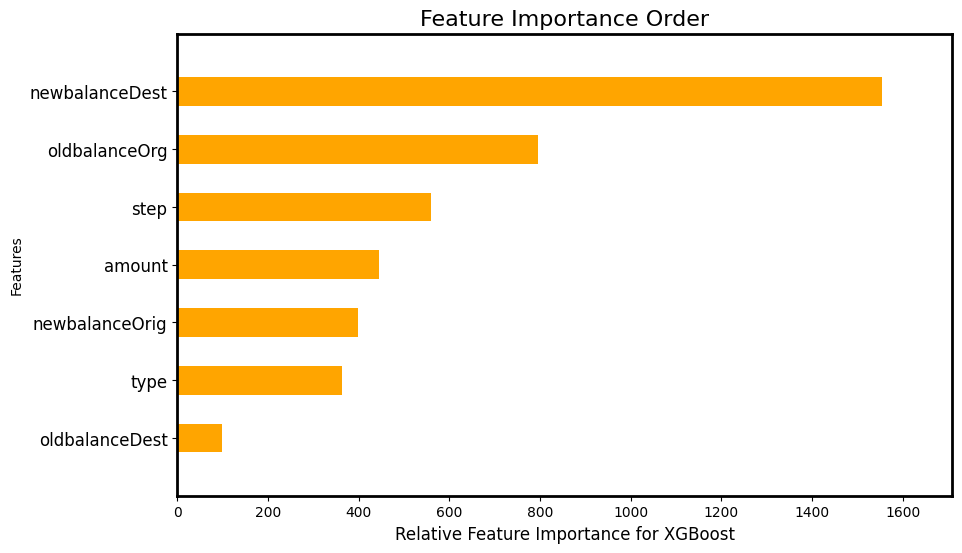

In [ ]:
# plot the important features - based on XGBOOST
from xgboost import plot_importance

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
colours = plt.cm.Set1(np.linspace(0, 1, 9))
ax = plot_importance(xgb_model, height = 0.5, color = 'orange', grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
ax.set_xlabel('Relative Feature Importance for XGBoost', size=12);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Feature Importance Order', size = 16);

# 6. Conclusion

**Seluruh penjelasan sudah terdapat pada script Final Project**